In [3]:
def load_model_data( model_id ):
    #import libraries
    import pandas as pd 
    import joblib

    # read data
    train_file_name = f'../models/model_{model_id}/data/X_train.csv'
    test_file_name = f'../models/model_{model_id}/data/y_train.csv'
    timestamps_file_name = f'../models/model_{model_id}/data/timestamps_ids.csv'

    features = pd.read_csv( train_file_name , index_col=0 )
    target = pd.read_csv( test_file_name , index_col=0 )
    time_stamps_df = pd.read_csv( timestamps_file_name , index_col=0 )

    # load the trained model
    model_pkl = f'../models/model_{model_id}/model/model.pkl'
    model = joblib.load(model_pkl)

    return model , features , target, time_stamps_df

In [24]:
model_1 , features_1 , target_1 , timeStamps_1 = load_model_data( 1 )
model_2 , features_2 , target_2 , timeStamps_2 = load_model_data( 2 )

In [28]:
pred_df_1 = target_1.copy()
pred_df_1['bg+1:00_pred'] = model_1.predict( features_1 )
pred_df_1['abs_error'] = abs(pred_df_1['bg+1:00_pred']-pred_df_1['bg+1:00'])
pred_df_1 = pred_df_1.join( timeStamps_1 )
pred_df_1.index = pd.MultiIndex.from_arrays([pred_df_1.index, pred_df_1['time']], names=['id', 'time'])
pred_df_1 = pred_df_1.drop( 'time' , axis = 1 )
pred_df_1

,,bg+1:00,bg+1:00_pred,abs_error
id,time,,,
p01_0,06:10:00,13.4,12.697314,0.702686
p01_1,06:25:00,12.8,12.996518,0.196518
p01_2,06:40:00,15.5,12.688621,2.811379
p01_3,06:55:00,14.8,12.903560,1.896440
p01_4,07:10:00,12.7,11.640526,1.059474
...,...,...,...,...
p12_25294,23:35:00,11.1,9.853874,1.246126
p12_25295,23:40:00,10.9,10.326504,0.573496
p12_25296,23:45:00,10.7,10.778759,0.078759


In [29]:
pred_df_2 = target_2.copy()
pred_df_2['bg+1:00_pred'] = model_2.predict( features_2 )
pred_df_2['abs_error'] = abs(pred_df_2['bg+1:00_pred']-pred_df_2['bg+1:00'])
pred_df_2 = pred_df_2.join( timeStamps_2 )
pred_df_2.index = pd.MultiIndex.from_arrays([pred_df_2.index, pred_df_2['time']], names=['id', 'time'])
pred_df_2 = pred_df_2.drop( 'time' , axis = 1 )
pred_df_2

,,bg+1:00,bg+1:00_pred,abs_error
id,time,,,
p01_0,06:10:00,13.4,12.096037,1.303963
p01_1,06:25:00,12.8,12.358576,0.441424
p01_2,06:40:00,15.5,12.377337,3.122663
p01_3,06:55:00,14.8,12.716197,2.083803
p01_4,07:10:00,12.7,12.049277,0.650723
...,...,...,...,...
p24_test_95510,NaN,6.4,7.441349,1.041349
p24_test_95511,NaN,6.4,7.460908,1.060908
p24_test_95512,NaN,6.4,7.831649,1.431649


In [30]:
common_preds_df = pred_df_1.join( pred_df_2 , lsuffix='_m1', rsuffix='_m2' )
common_preds_df

,,bg+1:00_m1,bg+1:00_pred_m1,abs_error_m1,bg+1:00_m2,bg+1:00_pred_m2,abs_error_m2
id,time,,,,,,
p01_0,06:10:00,13.4,12.697314,0.702686,13.4,12.096037,1.303963
p01_1,06:25:00,12.8,12.996518,0.196518,12.8,12.358576,0.441424
p01_2,06:40:00,15.5,12.688621,2.811379,15.5,12.377337,3.122663
p01_3,06:55:00,14.8,12.903560,1.896440,14.8,12.716197,2.083803
p01_4,07:10:00,12.7,11.640526,1.059474,12.7,12.049277,0.650723
...,...,...,...,...,...,...,...
p12_25294,23:35:00,11.1,9.853874,1.246126,11.1,10.372102,0.727898
p12_25295,23:40:00,10.9,10.326504,0.573496,10.9,10.946154,0.046154
p12_25296,23:45:00,10.7,10.778759,0.078759,10.7,11.241052,0.541052


In [ ]:
p_ids = common_preds_df.index.get_level_values('id').tolist()
p_ids = [id.split('_')[0] for id in p_ids]
common_preds_df['p_id'] = p_ids
set_p_ids =list( set( p_ids ) )
set_p_ids 

['p04', 'p10', 'p11', 'p01', 'p06', 'p12', 'p02', 'p05']

In [43]:
import random
rand_p_id = random.choice(set_p_ids)
print(f'Random Patient ID: {rand_p_id}')

Random Patient ID: p05


In [59]:
preds_dfs = common_preds_df[ common_preds_df['p_id'] == rand_p_id ]
preds_dfs['time'] = pd.to_datetime( preds_dfs.index.get_level_values('time').tolist() )
preds_dfs

/var/folders/p8/8wyrdyt14zvb95xl0qh7mcq00000gn/T/ipykernel_53763/3560384609.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  preds_dfs['time'] = pd.to_datetime( preds_dfs.index.get_level_values('time').tolist() )
/var/folders/p8/8wyrdyt14zvb95xl0qh7mcq00000gn/T/ipykernel_53763/3560384609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_dfs['time'] = pd.to_datetime( preds_dfs.index.get_level_values('time').tolist() )


,,bg+1:00_m1,bg+1:00_pred_m1,abs_error_m1,bg+1:00_m2,bg+1:00_pred_m2,abs_error_m2,p_id,time
id,time,,,,,,,,
p05_0,06:05:00,4.0,5.436345,1.436345,4.0,5.055395,1.055395,p05,2024-12-13 06:05:00
p05_1,06:20:00,4.1,5.670001,1.570001,4.1,5.002934,0.902934,p05,2024-12-13 06:20:00
p05_2,06:35:00,4.1,5.599662,1.499662,4.1,5.022083,0.922083,p05,2024-12-13 06:35:00
p05_3,06:50:00,3.7,5.570534,1.870534,3.7,5.150038,1.450038,p05,2024-12-13 06:50:00
p05_4,07:05:00,3.1,5.605013,2.505013,3.1,5.439715,2.339715,p05,2024-12-13 07:05:00
...,...,...,...,...,...,...,...,...,...
p05_8283,22:50:00,5.9,6.413923,0.513923,5.9,6.422687,0.522687,p05,2024-12-13 22:50:00
p05_8284,23:05:00,6.1,6.185804,0.085804,6.1,6.211982,0.111982,p05,2024-12-13 23:05:00
p05_8285,23:20:00,6.1,6.058313,0.041687,6.1,6.096001,0.003999,p05,2024-12-13 23:20:00


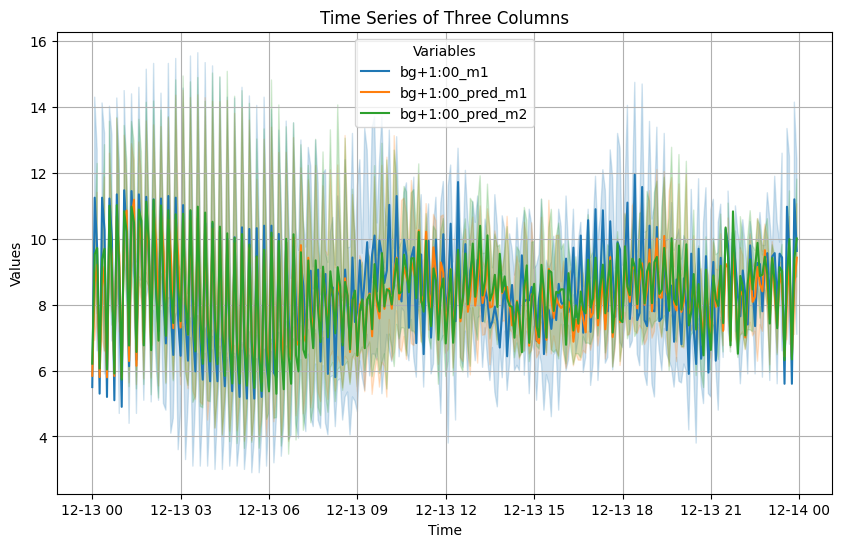

In [62]:
# Melt the DataFrame to have a long format
import matplotlib.pyplot as plt
import seaborn as sns

dfs = preds_dfs.iloc[1000:2000,][['time','bg+1:00_m1','bg+1:00_pred_m1','bg+1:00_pred_m2']]
df_melted = dfs.melt(id_vars="time", var_name="variable", value_name="value")

# Create the time series plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x="time", y="value", hue="variable")
plt.title("Time Series of Three Columns")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend(title="Variables")
plt.grid()
plt.show()

In [57]:
import pandas as pd

# Example list of time stamps
#time_stamps = ["23:30:00", "01:15:00", "02:45:00", "22:30:00", "00:15:00"]
time_stamps = common_preds_df.index.get_level_values('time').tolist()
# Initial reference date
initial_date = pd.Timestamp("2024-12-13")

# Initialize the resulting datetime list
datetime_list = []

# Keep track of the current date
current_date = initial_date

# Track the previous time
previous_time = None
switch_counts = 0

# Iterate through the time stamps
for time in time_stamps:
    current_time = pd.Timestamp(f"{current_date} {time}")

    # If the time decreases, increment the date
    if previous_time and current_time.time() < previous_time.time():
        current_date += pd.Timedelta(days=1)
        current_time = pd.Timestamp(f"{current_date} {time}")
        switch_counts += 1

    # Add the datetime to the list and update the previous time
    datetime_list.append(current_time)
    previous_time = current_time

# Convert to a Pandas Series if needed
datetime_series = pd.Series(datetime_list)

print(datetime_series)


0        2024-12-13 06:10:00
1        2024-12-13 06:25:00
2        2024-12-13 06:40:00
3        2024-12-13 06:55:00
4        2024-12-13 07:10:00
                 ...        
150991   2026-12-07 23:35:00
150992   2026-12-07 23:40:00
150993   2026-12-07 23:45:00
150994   2026-12-07 23:50:00
150995   2026-12-07 23:55:00
Length: 150996, dtype: datetime64[ns]


In [58]:
switch_counts

724

In [56]:
pd.Timestamp("2024-12-13")+pd.Timedelta(days=1)

Timestamp('2024-12-14 00:00:00')

In [54]:
datetime_series.dt.year

0         2024
1         2024
2         2024
3         2024
4         2024
          ... 
150991    2026
150992    2026
150993    2026
150994    2026
150995    2026
Length: 150996, dtype: int32

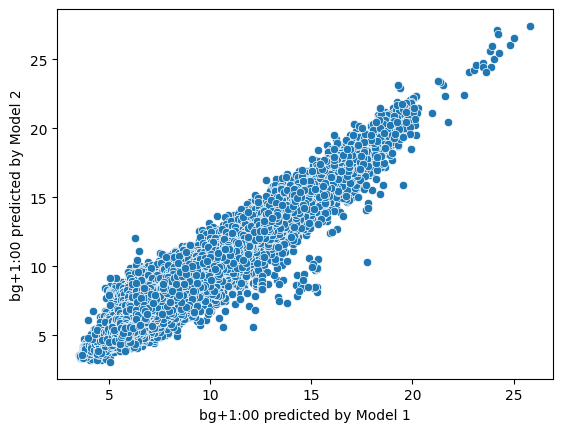

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot
sns.scatterplot(data=common_preds_df, x='bg+1:00_pred_m1', y='bg+1:00_pred_m2')

# Add labels and title
plt.xlabel('bg+1:00 predicted by Model 1')
plt.ylabel('bg+1:00 predicted by Model 2')

# Show the plot
plt.show()

In [ ]:
 train_data, augmented_data, test_data = common_load_data('1_00h', True)

    train_data_transformed = pipeline.fit_transform(pd.concat([train_data, augmented_data]))
    test_data_transformed = pipeline.transform(test_data)

    X_train = train_data_transformed.drop(columns=['bg+1:00'])
    X_train.to_csv(filename_x_train)

    y_train = train_data_transformed['bg+1:00']
    y_train.to_csv(filename_y_train)

    X_test = test_data_transformed
    X_test.to_csv(filename_x_test)

    # Save a table the the time
    time_stamps_df = train_data['time']

In [47]:
import os 
os.chdir('/Users/masaver/Desktop/masaver/data_science_projects/sep24_bds_int_medical')
from src.features.helpers.load_data import load_data as common_load_data
train_data, augmented_data, test_data = common_load_data('1_00h', True)


In [49]:
train_data.time.dt.day

AttributeError: Can only use .dt accessor with datetimelike values